<a href="https://colab.research.google.com/github/apschlissel/w266-final-project/blob/main/BERT_reddit_%2B_NB%2C_n_%3D_500_(Kevin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

     |████████████████████████████████| 3.8 MB 4.4 MB/s 
     |████████████████████████████████| 6.5 MB 12.6 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 596 kB 37.3 MB/s 
     |████████████████████████████████| 895 kB 17.5 MB/s 


In [2]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 5.5 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 1.7 MB 28.9 MB/s 
     |████████████████████████████████| 10.1 MB 11.4 MB/s 
     |████████████████████████████████| 325 kB 31.1 MB/s 
     |████████████████████████████████| 181 kB 18.9 MB/s 
     |████████████████████████████████| 144 kB 34.7 MB/s 
     |████████████████████████████████| 63 kB 163 kB/s 
     |████████████████████████████████| 212 kB 35.2 MB/s 
     |████████████████████████████████| 1.1 MB 32.5 MB/s 
     |████████████████████████████████| 134 kB 19.4 MB/s 
     |████████████████████████████████| 127 kB 30.0 MB/s 
     |████████████████████████████████| 271 kB 32.1 MB/s 
     |████████████████████████████████| 144 kB 7.6 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 76 kB 2.7 MB/s 
     |█████████████████

In [3]:
# Useful Links / Source Code
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb
# Source: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
# Source: https://medium.com/@senthilnathangautham/colab-gcp-compute-how-to-link-them-together-98747e8d940e
# Source: https://stackoverflow.com/questions/49031798/when-i-use-google-colaboratory-how-to-save-image-weights-in-my-google-drive

In [4]:
from __future__ import print_function
import ipywidgets as widgets
from transformers import pipeline
from simpletransformers.t5 import T5Model, T5Args
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging
import numpy as np
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
import json
import random
import math
import requests
from bs4 import BeautifulSoup

In [5]:
# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth('pigKA_TKnDkXcatEGcbo8g', 'nawGKK2MfPtC6vKz8TjaNEnmYfAggA')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'Katsuuu100',
        'password': 'Testing159753'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyBot/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [6]:
# HTML web scraper, scrape top subreddits, SFW only.
# 
# Source: https://realpython.com/beautiful-soup-web-scraper-python/
# Source: https://stackoverflow.com/questions/40210093/how-do-i-scrape-only-div-class-quotetext-from-a-website-using-python


URL = "http://redditlist.com/sfw/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
# print(soup.prettify())
job_elements = soup.find_all("div", class_="listing-item")

# print(job_elements[0])

# Filter to only the Top 125 Most subscribed subreddits
job_elements = job_elements[125:250]

master_subreddit_list = []
# Find subreddit names
for job_element in job_elements:
  links = job_element.find_all("a")
  for link in links:
    print(link.text.strip())
    master_subreddit_list.append(link.text.strip())

announcements
funny
AskReddit
gaming
aww
Music
pics
worldnews
movies
science
todayilearned
videos
news
Showerthoughts
Jokes
food
askscience
IAmA
EarthPorn
gifs
nottheonion
books
DIY
explainlikeimfive
Art
LifeProTips
space
sports
mildlyinteresting
Documentaries
gadgets
memes
tifu
photoshopbattles
UpliftingNews
GetMotivated
dataisbeautiful
listentothis
history
philosophy
television
InternetIsBeautiful
Futurology
WritingPrompts
OldSchoolCool
personalfinance
nosleep
creepy
TwoXChromosomes
wallstreetbets
technology
wholesomememes
AdviceAnimals
interestingasfuck
Fitness
politics
WTF
lifehacks
oddlysatisfying
relationship_advice
Minecraft
NatureIsFuckingLit
travel
facepalm
Whatcouldgowrong
nextfuckinglevel
pcmasterrace
leagueoflegends
BlackPeopleTwitter
me_irl
Unexpected
dankmemes
bestof
dadjokes
buildapc
Tinder
PS4
MadeMeSmile
AnimalsBeingBros
Damnthatsinteresting
tattoos
CryptoCurrency
AnimalsBeingJerks
photography
nba
AnimalsBeingDerps
gardening
BikiniBottomTwitter
trippinthroughtime
Watch

In [7]:
# Pick 5 random subreddits
five_random_subreddits = random.choices(master_subreddit_list, k=5)
print(five_random_subreddits)

['mildlyinteresting', 'aww', 'dadjokes', 'AdviceAnimals', 'books']


In [8]:
# Source: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
# Source: https://pynative.com/python-random-choice/
# Pull from 5 classes. 5 classes = 5 subreddits.

my_list_of_dictionaries = []
total = 0
# Target Count for test set = 100.
n = int(math.ceil(100/0.20/25))

# url_list_check = [f"https://oauth.reddit.com/r/{five_random_subreddits[0]}/new/",
#           f"https://oauth.reddit.com/r/{five_random_subreddits[1]}/new/",
#           f"https://oauth.reddit.com/r/{five_random_subreddits[2]}/new/",
#           f"https://oauth.reddit.com/r/{five_random_subreddits[3]}/new/",
#           f"https://oauth.reddit.com/r/{five_random_subreddits[4]}/new/"
#           ]

url_list_check = [f"https://oauth.reddit.com/r/wallstreetbets/new/",
          f"https://oauth.reddit.com/r/teenagers/new/",
          f"https://oauth.reddit.com/r/copypasta/new/",
          f"https://oauth.reddit.com/r/genz/new/",
          f"https://oauth.reddit.com/r/unpopularopinion/new/",
          # f"https://oauth.reddit.com/r/frat/new/"
          ]

for i in range(len(url_list_check)):
    
  # print(url_list_check[i])
  res_check = requests.get(url_list_check[i],
                    headers=headers,
                    params={"limit": "1"})
  
  # print(res_check)
  # print(json.dumps(res_check.json()["data"]["children"][0]["data"]["name"], indent=4))
  name = res_check.json()["data"]["children"][0]["data"]["name"]
  page_count = 25
  
  for j in range(n):

    # url_list = [f"https://oauth.reddit.com/r/{five_random_subreddits[0]}/new/?count={page_count}&after={name}",
    #         f"https://oauth.reddit.com/r/{five_random_subreddits[1]}/new/?count={page_count}&after={name}",
    #         f"https://oauth.reddit.com/r/{five_random_subreddits[2]}/new/?count={page_count}&after={name}",
    #         f"https://oauth.reddit.com/r/{five_random_subreddits[3]}/new/?count={page_count}&after={name}",
    #         f"https://oauth.reddit.com/r/{five_random_subreddits[4]}/new/?count={page_count}&after={name}"
    #         ]

    url_list = [f"https://oauth.reddit.com/r/wallstreetbets/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/teenagers/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/copypasta/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/genz/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/unpopularopinion/new/?count={page_count}&after={name}",
            # f"https://oauth.reddit.com/r/frat/new/?count={page_count}&after={name}"
            ]
    
    print("Page Count:", page_count)
    print("Name:", name)
    print("Url:", url_list[i])
    
    res = requests.get(url_list[i],
                    headers=headers)
                    # params={"limit": "100"})

    reddit_dictionary = res.json()

    for k in range(len(reddit_dictionary["data"]["children"])):
      my_dictionary = {}
      my_dictionary["subreddit"] = reddit_dictionary["data"]["children"][k]["data"]["subreddit"]
      my_dictionary["text"] = reddit_dictionary["data"]["children"][k]["data"]["selftext"]
      # If a reddit post is has no body text:
      if my_dictionary["text"] == "":
        # Replace with title of reddit post.
        my_dictionary["text"] = reddit_dictionary["data"]["children"][k]["data"]["title"]
      
      print(my_dictionary["text"])
      # my_dictionary["title"] = reddit_dictionary["data"]["children"][k]["data"]["title"]
      # my_dictionary["url"] = reddit_dictionary["data"]["children"][k]["data"]["url"]
      # print(reddit_dictionary["data"]["children"][k]["data"]["subreddit"])
      # print(reddit_dictionary["data"]["children"][k]["data"]["selftext"])
      # print(reddit_dictionary["data"]["children"][k]["data"]["url"])
      my_list_of_dictionaries.append(my_dictionary)
      total += 1
      name = reddit_dictionary["data"]["children"][k]["data"]["name"]
    # print(json.dumps(my_list_of_dictionaries, indent=4, sort_keys=False))
    
    page_count += 25

print("Total gathered:", total)

Streaming output truncated to the last 5000 lines.
will be placed in DEPARTMENTAL EDUCATIONAL EVALUATION
PROGRAMS (D.E.E.P. S.H.I.T.). Those who fail to take D.E.E.P.
S.H.I.T. seriously will have to go to EDUCATIONAL ATTITUDE
TRAINING (E.A.T. S.H.I.T.). Since our lecturers took S.H.I.T.
before they graduated, they don't have to do S.H.I.T.
anymore, as they are all full of S.H.I.T. already. If you
are full of S.H.I.T., you may be interested in a job teaching
others. We can add your name to our BASIC UNDERSTANDING
LECTURE LIST (B.U.L.L. S.H.I.T.). For students who are
attending to pursue a carrier in management and consultancy,
we will refer you to the department of MANAGERIAL OPERATIONAL
RESEARCH EDUCATION (M.O.R.E. S.H.I.T.). This course
emphasizes on how to manage M.O.R.E. S.H.I.T. If you have
further questions, please direct them to our HEAD OF TEACHING
SPECIAL HIGH INTENSITY TRAINING (H.O.T. S.H.I.T.)

Thank you, BOSS IN GENERAL SPECIAL HIGH INTENSITY TRAINING
(B.I.G. S.H.I.T.)*
Las

In [9]:
# Source: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb
# Convert list of dictionaries into pandas df
df = pd.DataFrame(my_list_of_dictionaries)
df.head()

,subreddit,text
0,wallstreetbets,"Admittedly, expected this call to expire worth..."
1,wallstreetbets,Realized the error of my ways tonight …. I wen...
2,wallstreetbets,I thought about shorting OKTA overnight. \n\n...
3,wallstreetbets,What I think when I see your gain porn
4,wallstreetbets,GME - Simplest DD - Beginning of 🌙


In [10]:
# Check if there is body text in reddit post
print(df['text'][0])

Admittedly, expected this call to expire worthless (purchased early January). Loss was 90%, now only 31%. Need price at $1,200+ quickly to reach profit &amp; offset decay. Tough exit point decision to be made here.


In [11]:
# Check if total is correct per subreddit
df['subreddit'].value_counts()

wallstreetbets      500
teenagers           500
copypasta           500
GenZ                500
unpopularopinion    500
Name: subreddit, dtype: int64

In [12]:
possible_labels = df.subreddit.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'GenZ': 3,
 'copypasta': 2,
 'teenagers': 1,
 'unpopularopinion': 4,
 'wallstreetbets': 0}

In [13]:
df['label'] = df.subreddit.replace(label_dict)

In [14]:
df.head()

,subreddit,text,label
0,wallstreetbets,"Admittedly, expected this call to expire worth...",0
1,wallstreetbets,Realized the error of my ways tonight …. I wen...,0
2,wallstreetbets,I thought about shorting OKTA overnight. \n\n...,0
3,wallstreetbets,What I think when I see your gain porn,0
4,wallstreetbets,GME - Simplest DD - Beginning of 🌙,0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.20, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

In [16]:
df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [17]:
df.groupby(['subreddit', 'label', 'data_type']).count()

text
subreddit        label data_type      
GenZ             3     train       400
                       val         100
copypasta        2     train       400
                       val         100
teenagers        1     train       400
                       val         100
unpopularopinion 4     train       400
                       val         100
wallstreetbets   0     train       400
                       val         100

In [ ]:
# Bert model begins
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(dataset_train), len(dataset_val)

(2000, 500)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
f1_list = []
train_loss_list = []
val_loss_list = []

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/W266/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    train_loss_list.append(loss_train_avg)
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    val_loss_list.append(val_loss)
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    f1_list.append(val_f1)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/667 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.0655046675627915
Validation loss: 0.656815850538408
F1 Score (Weighted): 0.7632534360172956


Epoch 2:   0%|          | 0/667 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.5520904177556867
Validation loss: 0.5281888862157207
F1 Score (Weighted): 0.8164032472798045


Epoch 3:   0%|          | 0/667 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.3575677281270722
Validation loss: 0.6269764480638335
F1 Score (Weighted): 0.8066126657262198


Epoch 4:   0%|          | 0/667 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.2222628106364514
Validation loss: 0.721238545640539
F1 Score (Weighted): 0.8064078230240529


Epoch 5:   0%|          | 0/667 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.15145905919699768
Validation loss: 0.7291928014646892
F1 Score (Weighted): 0.8265969162136717


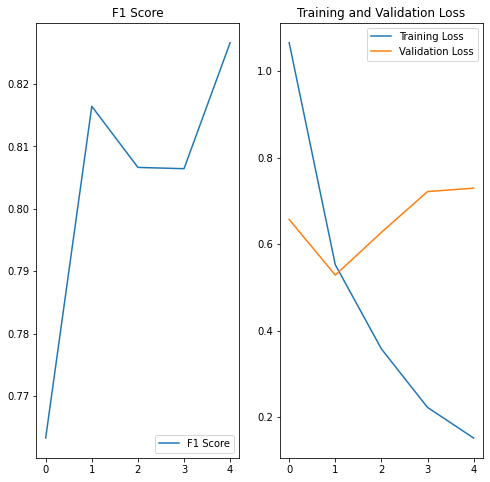

In [ ]:
# Plot F1 and losses over epochs
acc = f1_list
#val_acc = model.history['val_accuracy']

loss = train_loss_list
val_loss = val_loss_list

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='F1 Score')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('F1 Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
model.load_state_dict(torch.load('/content/gdrive/MyDrive/W266/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: wallstreetbets
Accuracy: 80/100

Class: teenagers
Accuracy: 88/100

Class: copypasta
Accuracy: 77/100

Class: GenZ
Accuracy: 47/100

Class: unpopularopinion
Accuracy: 92/100



In [ ]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# cm_bert = confusion_matrix(true_vals, predictions)
# ac_bert = accuracy_score(true_vals, predictions)

In [ ]:
# Naive Bayes Model
# Source: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train, X_val, y_train, y_val
print(X_train.shape)
print(X_val.shape)
# Reshape makes it (2400, 1) instead of (2400, )
# Source: https://stackoverflow.com/questions/58498187/sklearn-transform-error-expected-2d-array-got-1d-array-instead
X_train2 = sc.fit_transform(X_train.reshape(-1,1))
X_test2 = sc.transform(X_val.reshape(-1,1))

(2000,)
(500,)


In [18]:
# Source: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train.reshape(-1,1), y_train)

GaussianNB()

In [23]:
y_pred = classifier.predict(X_val.reshape(-1,1))

0.994


[Text(0, 0.5, 'wallstreetbets'),
 Text(0, 1.5, 'teenagers'),
 Text(0, 2.5, 'copypasta'),
 Text(0, 3.5, 'GenZ'),
 Text(0, 4.5, 'unpopularopinion')]

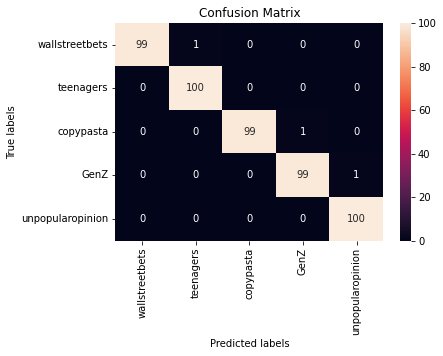

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_nb = confusion_matrix(y_val, y_pred)
ac_nb = accuracy_score(y_val, y_pred)
print(ac_nb)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm_nb, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(pd.unique(df['subreddit'].values))
ax.yaxis.set_ticklabels(pd.unique(df['subreddit'].values))